[*********************100%***********************]  1 of 1 completed

Logistic Regression - Accuracy: 0.5283018867924528, Precision: 0.5510204081632653, Recall: 0.9, F1 Score: 0.6835443037974683
Confusion Matrix:
[[  4  88]
 [ 12 108]]


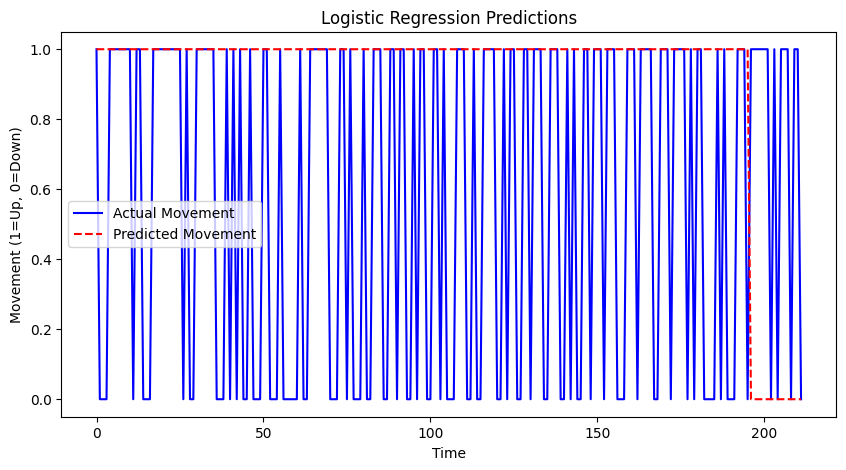

Random Forest - Accuracy: 0.49528301886792453, Precision: 0.5511811023622047, Recall: 0.5833333333333334, F1 Score: 0.5668016194331984
Confusion Matrix:
[[35 57]
 [50 70]]


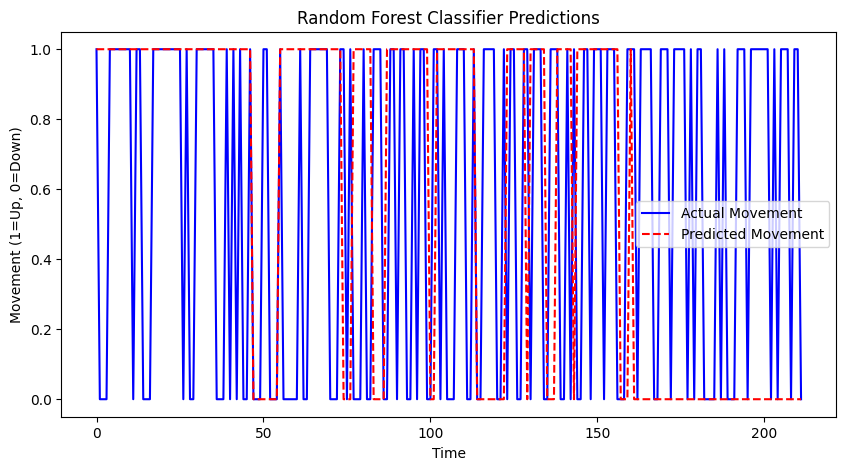

Support Vector Classifier - Accuracy: 0.5424528301886793, Precision: 0.5804195804195804, Recall: 0.6916666666666667, F1 Score: 0.6311787072243346
Confusion Matrix:
[[32 60]
 [37 83]]


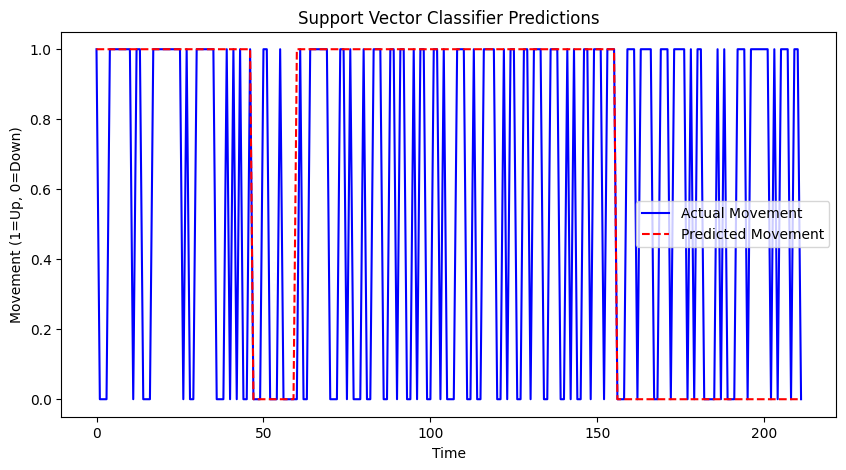

Decision Tree - Accuracy: 0.49056603773584906, Precision: 0.54, Recall: 0.675, F1 Score: 0.6
Confusion Matrix:
[[23 69]
 [39 81]]


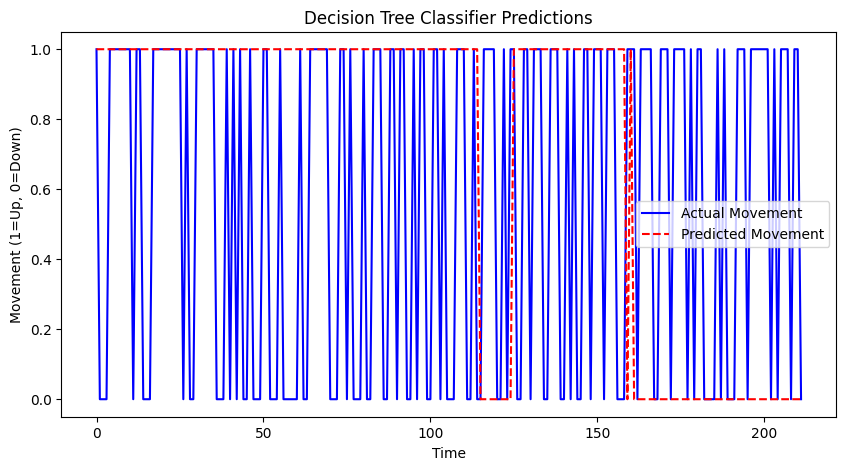

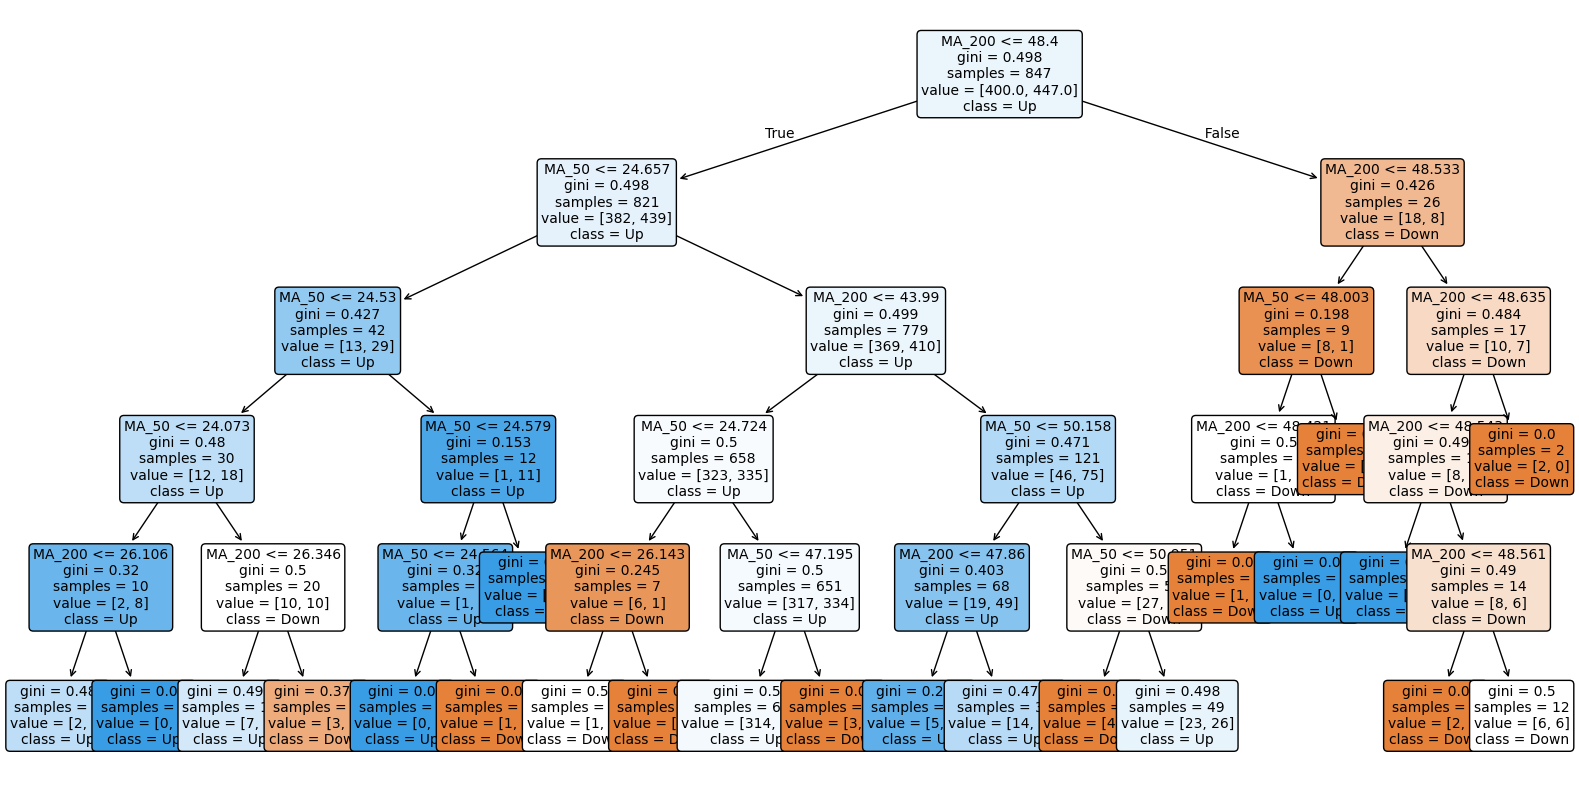

Linear Regression - Mean Squared Error: 22.10385196152096, R-squared: 0.6178389579808445


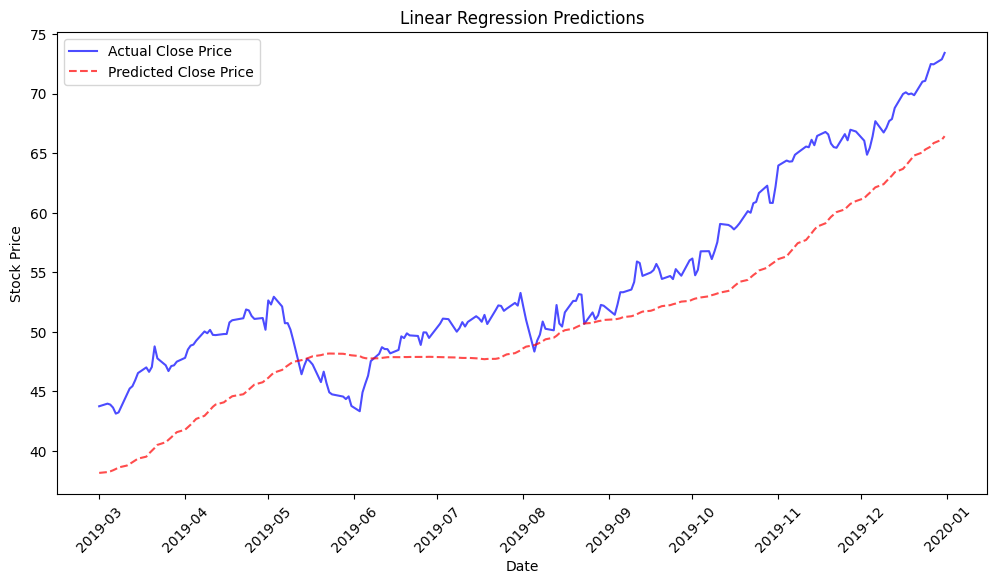

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Download Historical Data
def download_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Step 2: Feature Engineering - Adding Moving Averages and Target (Classification + Regression)
def add_features(data):
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['MA_200'] = data['Close'].rolling(window=200).mean()
    # Target for classification: 1 if the next day’s price is higher, else 0
    data['Target_Class'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    # Dropping NaN values caused by rolling window
    data = data.dropna()
    return data

# Step 3: Prepare Data (Separate for Classification and Regression)
def prepare_classification_data(data):
    X = data[['MA_50', 'MA_200']]
    y = data['Target_Class']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

def prepare_regression_data(data):
    X = data[['MA_50', 'MA_200']]
    y = data['Close'].shift(-1)
    y = y.dropna()  # Align X and y
    X = X.iloc[:-1]
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Evaluate Classification Models
def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix, y_pred

# Step 5: Train and Evaluate Regression Model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

# Step 6: Visualization Functions
def plot_classification_results(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label='Actual Movement', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted Movement', color='red', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Movement (1=Up, 0=Down)')
    plt.legend()
    plt.show()

def plot_regression_results(stock_data, y_test, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'][-len(y_test):], label='Actual Close Price', color='blue', alpha=0.7)
    plt.plot(stock_data['Close'][-len(y_pred):].index, y_pred, label='Predicted Close Price', color='red', linestyle='dashed', alpha=0.7)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# New: Function to Plot the Decision Tree
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=feature_names, class_names=['Down', 'Up'], filled=True, rounded=True, fontsize=10)
    plt.show()

# Step 7: Main Function to Run the Project
def main():
    ticker = 'AAPL'  # Apple stock ticker
    start_date = '2015-01-01'
    end_date = '2020-01-01'
    
    # Step 1: Download data
    stock_data = download_data(ticker, start_date, end_date)
    
    # Step 2: Feature Engineering
    stock_data = add_features(stock_data)
    
    # Prepare data for Classification models
    X_train_class, X_test_class, y_train_class, y_test_class = prepare_classification_data(stock_data)
    
    # Logistic Regression
    accuracy, precision, recall, f1, conf_matrix, y_pred_lr = evaluate_classification_model(LogisticRegression(), X_train_class, y_train_class, X_test_class, y_test_class)
    print(f'Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    plot_classification_results(y_test_class, y_pred_lr, 'Logistic Regression Predictions')
    
    # Random Forest Classifier
    accuracy, precision, recall, f1, conf_matrix, y_pred_rf = evaluate_classification_model(RandomForestClassifier(n_estimators=100), X_train_class, y_train_class, X_test_class, y_test_class)
    print(f'Random Forest - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    plot_classification_results(y_test_class, y_pred_rf, 'Random Forest Classifier Predictions')
    
    # Support Vector Classifier
    accuracy, precision, recall, f1, conf_matrix, y_pred_svc = evaluate_classification_model(SVC(kernel='rbf', C=100, gamma=0.1), X_train_class, y_train_class, X_test_class, y_test_class)
    print(f'Support Vector Classifier - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    plot_classification_results(y_test_class, y_pred_svc, 'Support Vector Classifier Predictions')
    
    # Decision Tree Classifier
    dt_model = DecisionTreeClassifier(max_depth=5)
    accuracy, precision, recall, f1, conf_matrix, y_pred_dt = evaluate_classification_model(dt_model, X_train_class, y_train_class, X_test_class, y_test_class)
    print(f'Decision Tree - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    plot_classification_results(y_test_class, y_pred_dt, 'Decision Tree Classifier Predictions')
    plot_decision_tree(dt_model, feature_names=['MA_50', 'MA_200'])  # Plot the Decision Tree
    
    # Prepare data for Regression model
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = prepare_regression_data(stock_data)
    
    # Linear Regression
    mse, r2, y_pred_lr_reg = evaluate_regression_model(LinearRegression(), X_train_reg, y_train_reg, X_test_reg, y_test_reg)
    print(f'Linear Regression - Mean Squared Error: {mse}, R-squared: {r2}')
    plot_regression_results(stock_data, y_test_reg, y_pred_lr_reg, 'Linear Regression Predictions')

# Run the project
if __name__ == "__main__":
    main()
